In [1]:
pwd

'/home/jovyan/ghw2019_wiggles'

In [1]:
%matplotlib --list
#

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.close()
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

data_index = 5
path = '/var/tmp/passiveseismic/Rhythm/modeling/'
f = open(path + 'bmhsm'+str(data_index)+'.rsf@', 'rb')
bm = np.fromfile(f, dtype = 'float32')
bm = bm.reshape((nz, nx), order = 'f')
plt.figure()
plt.imshow(bm)
plt.show()

plt.close()

In [5]:
## Path of data
path = '/var/tmp/passiveseismic/Rhythm/modeling/'

In [9]:
## Dimensions
nx = 391
nz = 91
nt = 1501
dims2 = [nz,nx]
dims3 = [nz, nx, nt]

In [7]:
def open_bin(bin_file, dims):

    file = open(path + bin_file, 'rb')
    M = np.fromfile(file, dtype = 'float32')
    M = M.reshape(dims, order = 'f')

    return M

In [8]:
# Generating Matrix Data
def matrix_data(data_index):

    P = 'Pmovie'+str(data_index)+'.rsf@'
    Z = 'Zmovie'+str(data_index)+'.rsf@'
    X = 'Xmovie'+str(data_index)+'.rsf@'

    Vel = 'bmhsm'+str(data_index)+'.rsf@'

    PM = open_bin(P, dims3)
    ZM = open_bin(Z, dims3)
    XM = open_bin(X, dims3)

    VelM = open_bin(Vel, dims2)
    
    return PM, ZM, XM, VelM

#Plot Data


In [24]:
def plot(data_index):
    
    Wiggle, In_Target, Out_Model_Predict = matrix_data(data_index)
    
    a = np.max(PM)
    b = np.min(PM)


    fig = plt.figure()
    ax = fig.add_subplot(411)
    ax1 = fig.add_subplot(412)
    ax2 = fig.add_subplot(413)
    ax3 = fig.add_subplot(414)
    fig.show()

    i = 0
    ax.imshow(VelM)
    while i<nt:
        ax1.cla()
        ax2.cla()
        ax3.cla()
    
        ax1.imshow(PM[:,:,i])  #, vmax = a-0.5, vmin = b+0.5

        ax2.imshow(XM[:,:,i], cmap = 'gray')  #, vmax = a, vmin = b

        ax3.imshow(ZM[:,:,i], cmap = 'gray')  #, vmax = a, vmin = b

        fig.canvas.draw()

        #time.sleep(1)
        i += 10

    plt.close()
    return

<IPython.core.display.Javascript object>


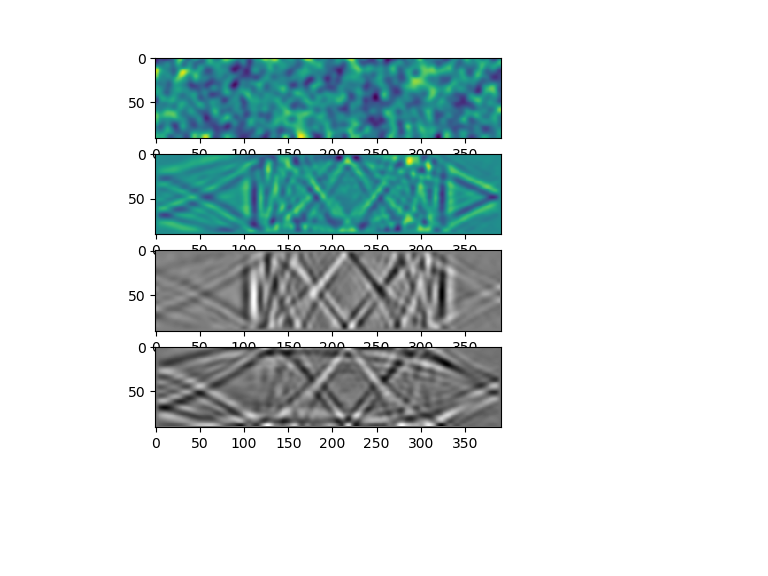

In [26]:
plt.close()
plot(50)